In [1]:
from my_packages import *
%matplotlib inline

data_folder = './data/'
pd.options.mode.chained_assignment = None
time_tracking = Time_Tracking()

# prepare data

In [2]:
time_tracking.start_tracking()
train_raw = pd.read_csv(data_folder + 'train_sample.csv')
gc.collect()
time_tracking.stop_tracking()

Time used: 0.0  minutes


In [3]:
# train, evaluate split 
data_index = np.arange(len(train_raw))
np.random.seed(123)
np.random.shuffle(data_index)

split_index = int(len(train_raw) * 0.7)
train_df, evaluate_df = train_raw.iloc[data_index[:split_index]], train_raw.iloc[data_index[split_index:]]
gc.collect()

0

# train and cross-validate

In [4]:
time_tracking.start_tracking()

our_model = MyXgbModel()
make_feat_param = {'sample_ratio':2, 'has_target':True, 'do_sample':True}

train_feat = our_model.make_feat_pipeline(train_df, make_feat_param)
gc.collect()

time_tracking.stop_tracking()

Time used: 0.0  minutes


In [5]:
train_param = {'eval_metric':'auc'}
train_x = train_feat.drop(['is_attributed', 'attributed_time'], axis =1)
train_y = train_feat['is_attributed']

train_cv, feat_importance = our_model.train(train_x, train_y, train_param)
gc.collect()
print('train cross-validation auc = {}'.format(round(train_cv,4)))

train cross-validation auc = 0.9961


Time used: 0.03  minutes


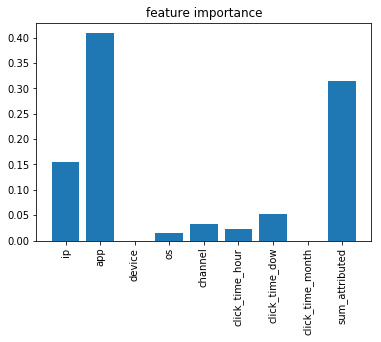

In [6]:
plt.bar(range(len(feat_importance)), feat_importance)
plt.xticks(range(len(feat_importance)), train_x.columns, rotation='vertical')
plt.title('feature importance')

time_tracking.stop_tracking()

# hyper-tune

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9987653999999999, 1.0, 0.9978856, 0.9991071999999999, 1.0]


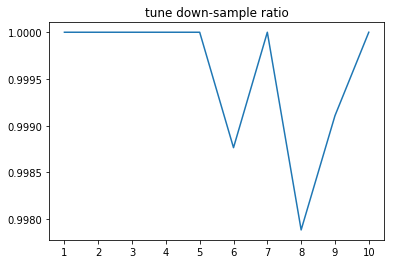

In [9]:
tune_auc = []
tune_range = np.arange(1, 11)

for sample_ratio in tune_range:

    make_feat_param = {'sample_ratio':sample_ratio, 'has_target':True, 'do_sample':True}

    our_model = MyXgbModel()
    evaluate_feat = our_model.make_feat_pipeline(evaluate_df, make_feat_param)
    x = evaluate_feat.drop(['is_attributed', 'attributed_time'], axis = 1)
    y = evaluate_feat['is_attributed']

    param = {'eval_metric':'auc'}
    train_cv, _ = our_model.train(x, y, param)

    tune_auc.extend([train_cv])

plt.figure()
plt.plot(tune_range, tune_auc)
plt.xticks(tune_range)
plt.title('tune down-sample ratio')

print(tune_auc)